### Challenge 2
### The dataset for this challenge represents the physicochemical tests of wine and the quality of wine as a result of these physicochemical tests. Here's a brief description of the columns
### volatile acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
### citric acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines
### residual sugar: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
### chlorides: The amount of salt in the wine
### free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
### total sulfur dioxide: Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
### density: The density of water is close to that of water depending on the percent alcohol and sugar content
### pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
### sulphates: A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
### alcohol: The percent alcohol content of the wine
### quality: Output variable (based on sensory data, score between 0 and 10)

### Here is a link to the dataset: https://drive.google.com/open?id=1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4

### Use polynomial regression to predict quality of wine using the physiochemical tests

### Hint:Try to get how well your model has been fitted using RMSE without necessarily plotting a graph



In [166]:
#Loading the libraries 

import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline 

In [167]:
data=pd.read_csv('../winequality-red.csv')

In [168]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

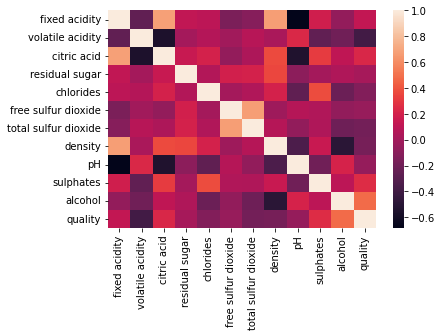

In [169]:
sns.heatmap(data.corr())

In [170]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [172]:
from sklearn.model_selection import train_test_split
X=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values

y=data['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(X_train,y_train)



LinearRegression()

In [ ]:
#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

34.99871062872124
[ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]


In [ ]:
y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,320.000000,320.000000
mean,5.593750,5.665047
std,0.757796,0.492689
min,3.000000,4.690601
25%,5.000000,5.277889
50%,6.000000,5.596139
75%,6.000000,6.023650
max,8.000000,6.971838


In [ ]:
from sklearn import metrics 

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




Mean Absolute Error: 0.4696330928661097
Mean Squared Error: 0.3844711978201234
Root Mean Squared Error: 0.620057414938426


# Start with Linear 

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_1=LinearRegression()
linear_reg_1.fit(X,y)

LinearRegression()

# Train the poly model 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)

poly_reg=poly_reg.fit_transform(X)

# Train Linear Model Again 

In [ ]:
linear_reg_2=LinearRegression()

linear_reg_2.fit(poly_reg,y)



LinearRegression()

ValueError: x and y must be the same size

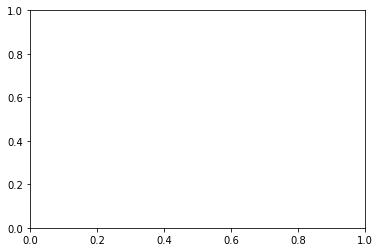

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

plt.scatter(X,y, color='red')
plt.plot(X, linear_reg_1.predict(X), color='blue')